In [4]:
from keras.datasets.mnist import load_data
# ((訓練圖片, 訓練答案), (測試圖片, 測試答案))
(x_train, y_train), (x_test, y_test) = load_data()

In [5]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


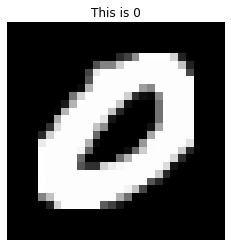

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
plt.title("This is " + str(y_train[c]))
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [15]:
import pandas as pd
pd.DataFrame(x_train[c])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,254,254,255,212,35,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,253,253,253,253,194,34,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,253,253,253,253,253,72,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,253,253,253,253,253,253,0,0,0,0
8,0,0,0,0,0,0,0,0,0,11,...,137,253,253,253,253,253,0,0,0,0
9,0,0,0,0,0,0,0,0,117,211,...,9,138,253,253,253,253,0,0,0,0


In [26]:
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
# 784 * 256 + 256(bias)
mlp.add(Dense(256, activation="relu", input_dim=784))
# 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [27]:
mlp.compile(loss="categorical_crossentropy",
            optimizer="adam",
            metrics=["accuracy"])

In [28]:
# 對圖片處理: 攤開(1D) -> 0~1(一開始隨機的weights才能配合上)
x_train_norm = x_train.reshape(60000, 784) / 255
x_test_norm = x_test.reshape(10000, 784) / 255

In [29]:
# 對答案處理: One-Hot Encoding -> 10個機率
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# DEMO
print("Before:", y_train[0])
print("After:", y_train_cat[0])

Before: 5
After: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [30]:
# batch_size: 看多少筆資料調整(梯度下降)一次
# 看資料決定: 資料小(100-200) 資料大(10-20)
# epochs: 整份資料(60000)看幾次[模型什麼時候該停止訓練]
# val_loss:平滑的時候你就該停下來了
# validation_split: 驗證模型多好要用沒看過的資料
# verbose: log多寡(1:最詳盡, 2:必要的而已 0:完全不印)
mlp.fit(x=x_train_norm, y=y_train_cat,
        batch_size=200, epochs=10,
        validation_split=0.1, verbose=2)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
 - 1s - loss: 0.3750 - acc: 0.8956 - val_loss: 0.1698 - val_acc: 0.9535
Epoch 2/10
 - 1s - loss: 0.1680 - acc: 0.9517 - val_loss: 0.1182 - val_acc: 0.9680
Epoch 3/10
 - 1s - loss: 0.1150 - acc: 0.9675 - val_loss: 0.0970 - val_acc: 0.9733
Epoch 4/10
 - 1s - loss: 0.0872 - acc: 0.9749 - val_loss: 0.0857 - val_acc: 0.9760
Epoch 5/10
 - 1s - loss: 0.0673 - acc: 0.9813 - val_loss: 0.0831 - val_acc: 0.9750
Epoch 6/10
 - 1s - loss: 0.0558 - acc: 0.9841 - val_loss: 0.0804 - val_acc: 0.9783
Epoch 7/10
 - 1s - loss: 0.0453 - acc: 0.9874 - val_loss: 0.0769 - val_acc: 0.9778
Epoch 8/10
 - 1s - loss: 0.0373 - acc: 0.9898 - val_loss: 0.0701 - val_acc: 0.9798
Epoch 9/10
 - 1s - loss: 0.0308 - acc: 0.9917 - val_loss: 0.0730 - val_acc: 0.9808
Epoch 10/10
 - 1s - loss: 0.0250 - acc: 0.9936 - val_loss: 0.0679 - val_acc: 0.9813


In [31]:
mlp.evaluate(x_test_norm, y_test_cat)

10000/10000 [==============================] - 0s 19us/step


[0.0682518808388384, 0.98]

In [33]:
from sklearn.metrics import confusion_matrix
base = list(range(10))
i = [(str(b) + "(原本)") for b in base]
c = [(str(b) + "(預測)") for b in base]

pre = mlp.predict_classes(x_test_norm)
pd.DataFrame(confusion_matrix(y_test, pre),
             columns=c,
             index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(原本),968,0,0,2,1,3,2,1,2,1
1(原本),0,1119,4,1,0,1,3,1,6,0
2(原本),5,0,1005,2,2,0,3,3,12,0
3(原本),0,0,0,996,0,3,0,4,3,4
4(原本),2,0,1,1,960,0,5,1,1,11
5(原本),2,0,0,8,2,869,5,0,3,3
6(原本),2,2,0,1,2,3,947,0,1,0
7(原本),0,2,9,4,1,0,0,1001,3,8
8(原本),4,0,1,5,5,4,2,2,948,3
9(原本),2,4,0,3,6,2,0,3,2,987
